In [2]:
from numpy import *
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.table import QTable
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck15
plt.style.use(astropy_mpl_style)

import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [3]:
path = os.path.expanduser('~/Desktop/Data/')
os.path.exists(path)

True

In [4]:
file = fits.open(os.path.expanduser('~/Desktop/Data/JWST/JADES_spec_grat.fits'))
# Table(file[1].data)

In [4]:
# huh2

In [5]:
# huh2 = Table(file[1].data).to_pandas()[~isnan(Table(file[1].data).to_pandas()['HB_4861_flux'])]
# huh2 = huh2[huh2['NIRCam_ID']!=999999]
# huh2['int_hb']=huh2['HB_4861_flux']/(1+huh2['z_Spec'])
# huh2 = huh2[huh2['z_Spec']>2.5]

In [5]:
huh = Table(file[1].data).to_pandas()[~isnan(Table(file[1].data).to_pandas()['HB_4861_flux'])]
huh['int_hb']=huh['HB_4861_flux']/(1+huh['z_Spec'])
huh = huh[huh['NIRCam_ID']!=999999][huh['z_Spec']>2.5] #Formerly 5.5
# huh

/tmp/ipykernel_840916/409424575.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  huh = huh[huh['NIRCam_ID']!=999999][huh['z_Spec']>2.5] #Formerly 5.5


In [6]:
hb_sion=[]
c=2.998e8
h= 6.626*10**-27
for i in (huh['NIRCam_ID']):
#     df = pd.read_csv(os.path.expanduser('~/Documents/FINAL-BluminosityParams/'+str(huh['zfourge_id'][i])+'-RF-lum-FINAL'),index_col=0,on_bad_lines='skip')
    df=pd.read_csv(os.path.expanduser('~/Documents/JSN25B/'+str(i)+'-RF-lum-JSN25'),index_col=0,on_bad_lines='skip')
    
    redshift=float(huh[huh['NIRCam_ID']==i]['z_Spec'])
#     print('redshift='+str(redshift))
    pos = (df['L_lambdaA'] - df['L_lambdaA'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    L_UV = (df['L_nuU'][pos]) #conversion to ergs/s
#     print('L_UV '+str(df['L_lambdaU'][pos]/3.826*10**33))
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    cm = meters*100
    dist2 = cm.value
    L_hb=huh[huh['NIRCam_ID']==i]['int_hb']*10**-20*4*pi*dist2**2
#     print('L_hb '+str(L_hb))
#     caseB= 4.86*10**-13
    caseB = 1.36*10**-12/2.89
    spec_sion=log10(L_hb/(L_UV*caseB))
#     print(str(i)+' sion '+str(spec_sion))
#     print('##################')
    hb_sion.append(float(spec_sion))

In [7]:
huh['sion']=hb_sion
huh.to_csv('specsions_jades.csv')

In [8]:
huh

,NIRSpec_ID,NIRCam_ID,RA_TARG,Dec_TARG,RA_NIRCam,Dec_NIRCam,Priority,z_Spec,z_Spec_flag,x_offset,...,He1_10829_flux,He1_10829_err,PaG_10938_flux,PaG_10938_err,PaB_12818_flux,PaB_12818_err,PaA_18751_flux,PaA_18751_err,int_hb,sion
11,00004404,101990,53.115372,-27.814771,53.115379,-27.814774,4.0,5.763,A,-0.088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.642318,25.165345
12,00006002,106292,53.110411,-27.808923,53.110417,-27.808924,4.0,5.937,A,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.772524,24.940828
13,00009422,113585,53.121755,-27.797634,53.121757,-27.797638,4.0,5.936,A,-0.032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.435698,25.632671
14,00016625,127219,53.169042,-27.778838,53.169047,-27.778834,4.0,6.631,A,0.059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.247805,25.724744
15,00016745,208642,53.130023,-27.778392,53.130051,-27.778389,4.0,5.567,A,-0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.222019,24.775185
16,00018846,131688,53.134917,-27.772709,53.134918,-27.772711,4.0,6.335,A,-0.044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.031357,25.336476
17,00018976,131971,53.166601,-27.772403,53.166602,-27.772402,4.0,6.327,A,-0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.441518,25.271436
18,00022251,138571,53.154069,-27.766072,53.154072,-27.766072,4.0,5.798,A,-0.009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.082671,25.080877
21,10013704,197348,53.126535,-27.818092,53.126538,-27.818090,4.0,5.920,A,-0.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.966763,24.130688
24,00017566,209276,53.156128,-27.775841,53.156101,-27.775881,4.0,6.102,A,0.077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.990707,24.078238


In [24]:
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=19,size_y=10):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax

/tmp/ipykernel_534258/2047124318.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


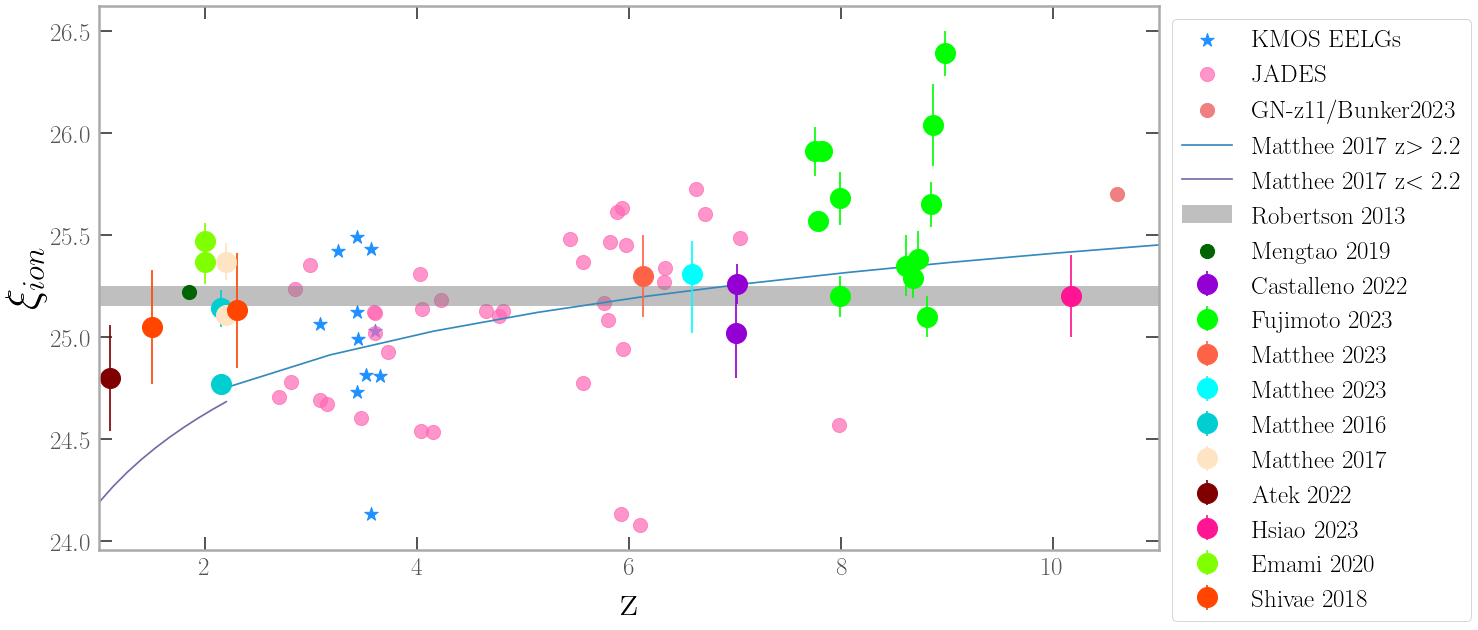

In [25]:
zfor = pd.read_csv(os.path.expanduser('~/notebook/Laptop/specsions.csv'))
# plt.style.use('dark_background')
# plt.figure(figsize=(19,10))
fig,ax=FancyPlot(r'z',r'$\xi_{ion}$')

plt.grid(False)
# mpl.rcParams.update({'font.size': 22})
plt.scatter(zfor['zspec'], zfor['spec_sion'],s=200, label='KMOS EELGs',c='dodgerblue',marker='*')
plt.scatter(huh['z_Spec'], hb_sion, s=200, alpha =0.7,label='JADES',c='hotpink',marker='o')

plt.scatter(10.6034,25.7,label='GN-z11/Bunker2023',s=200,c='lightcoral')
plt.errorbar(x=[7.0124,7.0121],y=[25.26,25.02],yerr=[0.1,0.22],label='Castalleno 2022',fmt='o',markersize=20,c='darkviolet')
#Lam et al
plt.errorbar(x=[7.99,8.81,8.68,8.72,8.61,7.78,7.99,8.85,7.82,7.75,8.87,8.98],
             y=[25.2,25.1,25.29,25.38,25.35,25.57,25.68,25.65,25.91,25.91,26.04,26.39],
             yerr=[0.1,0.1,0.1,0.14,0.15,0.03,0.13,0.11,0.05,0.12,0.2,0.11],label='Fujimoto 2023', fmt='o',markersize=20,c='lime')
plt.plot(linspace(2.2,11,10),(24.41+log10(linspace(2.2,11,10))),label=r'Matthee 2017 z$>2.2$')#Matthee 2017
plt.plot(linspace(1,2.2,10),(24.19+1.44*log10(linspace(1,2.2,10))),label=r'Matthee 2017 z$<2.2$')#Matthee 2017
plt.errorbar(x=6.13,y=25.3,yerr=0.2,fmt='o',label='Matthee 2023',markersize=20,c='tomato')
plt.errorbar(x=6.59,y=25.31,yerr=[[0.29],[0.16]],label='Matthee 2023',fmt='o',markersize=20,c='aqua')
plt.errorbar(x=[2.15,2.15],y=[24.77,25.14],yerr=[0.04, 0.09],fmt='o', label='Matthee 2016',markersize=20,c='darkturquoise')
plt.errorbar(x=[2.2,2.2],y=[25.11,25.37],yerr=[0.04,0.09],fmt='o',label='Matthee 2017',markersize=20,c='bisque')
#Osterbrock 1989 could have the caseB value
plt.errorbar(1.1,24.8,yerr=0.26,label='Atek 2022',fmt='o',markersize=20,c='maroon')
plt.errorbar(10.17,25.2,yerr=0.2,label='Hsiao 2023',markersize=20,c='deeppink',fmt='o')
plt.errorbar(x=[2,2],y=[25.47,25.37],yerr=[0.09,0.11],label='Emami 2020',fmt='o',markersize=20,c='chartreuse')
plt.errorbar([1.5,2.3],[25.05, 25.13],yerr=0.28,fmt='o' ,label='Shivae 2018',markersize=20,c='orangered')
# plt.errorbar(x=,y=[25.39,25.31],yerr=[0.64,0.43]label='Prieto-Lyon')#Nircam
############################################################
# plt.errorbar(x=(3.8+5.3)/2,y=25.36,yerr=0.08,label='Lam 2019p')
plt.axhspan(25.15,25.25, facecolor='gray', alpha=0.5, label='Robertson 2013')
plt.scatter(x=(1.3+2.4)/2,y=25.22,label='Mengtao 2019',c='darkgreen',s=200)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.legend(loc=4)
plt.xlim(1,11)
plt.xlabel('z')
plt.ylabel(r'$\xi_{ion}$')
plt.savefig('specsion.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [6]:
# 1.36*10**-12/2.86

In [7]:
# Table(file[1].data)[Table(file[1].data)['z_Spec']>5.5]['HB_4861_flux']

In [8]:
# Table(file[1].data)[Table(file[1].data)['z_Spec']>5.5]['HA_6563_flux']

In [26]:
file1 = fits.open(os.path.expanduser('~/Desktop/Data/JWST/JADES_spec.fits'))
# Table(file1[1].data).to_pandas()['HB_4861_flux'].dropna()

In [27]:
# Table(file[1].data).to_pandas()['HB_4861_flux'].dropna()

In [28]:
# Table(file1[1].data)[Table(file1[1].data)['z_Spec']>5.5]['HB_4861_flux']

In [29]:
file2 = fits.open(os.path.expanduser('~/Desktop/Data/JWST/JADES_phot.fits'))

In [30]:
df = Table(file2[7].data).to_pandas()
df2 = Table(file2[9].data).to_pandas()
mask = np.isnan(df2['z_spec'])
mask1 = df2['EAZY_z_a']>5.5
cosmo = Planck15
age_of_universe025 = cosmo.age(df2['EAZY_l95'])
age_of_universe975 = cosmo.age(df2['EAZY_u95'])
age_of_universe025.to(u.Gyr).value-age_of_universe975.to(u.Gyr).value
mask2 = age_of_universe025.to(u.Gyr).value-age_of_universe975.to(u.Gyr).value <0.2
mask3 = df2['EAZY_chisq_min']<50

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/astropy/cosmology/flrw/base.py:1000: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(self._lookback_time_integrand_scalar, z, inf)[0]
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in _integral_age (vectorized)
  outputs = ufunc(*inputs)


In [31]:
hb_df = pd.merge(left=df,right=huh[['NIRCam_ID', 'z_Spec']], left_on='ID', right_on='NIRCam_ID')
hb_df

,ID,RA,DEC,F090W_KRON,F090W_KRON_S,F090W_SEG,F115W_KRON,F115W_KRON_S,F115W_SEG,F150W_KRON,...,F125W_KRON_S_e,F125W_SEG_e,F140W_KRON_e,F140W_KRON_S_e,F140W_SEG_e,F160W_KRON_e,F160W_KRON_S_e,F160W_SEG_e,NIRCam_ID,z_Spec
0,101683,53.155794,-27.815209,4.894331,4.931013,5.239831,15.325004,12.474840,15.762773,14.136827,...,4.353322,6.507859,29.868380,16.664137,23.541746,10.191440,5.167253,7.912274,101683,6.713
1,101990,53.115379,-27.814774,31.898191,24.186321,30.349535,36.546295,33.643017,37.596996,39.697216,...,4.168700,10.024480,45.862396,13.958554,32.299686,15.838259,4.618960,10.999495,101990,5.763
2,106292,53.110417,-27.808924,24.336407,16.321671,24.517181,24.389576,18.073938,23.970354,24.374765,...,2.854528,7.800787,30.092428,17.351446,22.941742,12.470841,6.551692,9.323672,106292,5.937
3,106885,53.129726,-27.808180,16.250372,9.843689,13.926543,15.921491,12.395226,16.086264,10.728951,...,5.449367,8.131161,30.784014,17.545286,24.352638,11.633230,6.041436,9.109237,106885,5.562
4,109645,53.155486,-27.803891,46.086849,33.165730,43.243874,40.600540,28.584990,40.610836,30.661459,...,1.142715,3.257947,4.281729,1.062654,3.067185,4.696247,1.103803,3.322682,109645,4.044
5,110238,53.113325,-27.802995,98.883820,68.038765,91.358955,96.517876,70.953316,92.583794,81.456161,...,6.095549,17.826212,59.159065,18.551867,49.846260,22.041016,6.555393,18.424515,110238,4.149
6,110319,53.167302,-27.802874,11.337690,3.861764,9.826815,11.637416,7.647355,11.093228,11.383271,...,1.038510,1.891086,2.487601,1.481862,1.878590,2.669216,1.441523,1.990793,110319,5.821
7,110905,53.132845,-27.801860,33.795650,27.676908,35.540447,40.116722,30.475475,43.731220,42.114769,...,4.908322,17.402330,51.575508,15.844554,51.528061,17.684013,5.271136,17.638618,110905,4.649
8,113461,53.128737,-27.797875,13.906523,10.377147,12.645237,13.777827,10.876544,13.207973,14.143111,...,3.869648,8.621525,31.418547,9.418624,20.018608,16.791460,4.685071,10.384607,113461,5.443
9,113585,53.121757,-27.797638,43.723705,33.438198,43.266842,65.634178,50.227806,66.009392,53.037689,...,3.015677,12.026928,32.587833,9.833707,35.540001,11.801207,6.517008,12.924851,113585,5.936


In [32]:
mask4=df2['z_spec']>5.5
specs = df[mask4]
specs

,ID,RA,DEC,F090W_KRON,F090W_KRON_S,F090W_SEG,F115W_KRON,F115W_KRON_S,F115W_SEG,F150W_KRON,...,F105W_SEG_e,F125W_KRON_e,F125W_KRON_S_e,F125W_SEG_e,F140W_KRON_e,F140W_KRON_S_e,F140W_SEG_e,F160W_KRON_e,F160W_KRON_S_e,F160W_SEG_e
38,77910,53.170533,-27.844221,11.019117,7.594368,10.567319,21.726032,15.306145,20.247856,24.666958,...,6.313741,13.902647,3.696241,9.125811,38.925720,-11.180047,26.455130,19.182119,4.795823,12.439235
457,84518,53.156245,-27.836168,36.311790,24.115685,31.975311,31.822880,23.855753,30.686316,25.325222,...,7.526712,14.375845,3.932418,9.415924,43.312256,12.678237,29.238880,15.217882,4.291457,10.138142
1029,88612,53.162447,-27.830573,9.741658,6.586522,7.778915,12.906807,8.891262,13.155581,18.347233,...,3.431756,9.266095,4.747244,7.402720,32.666229,-17.602255,26.577538,10.415653,5.401327,8.440164
1348,90354,53.133825,-27.828256,-1.980610,0.215238,-0.682863,4.083546,1.772306,3.488077,4.279435,...,3.277902,7.147312,3.123187,4.255946,21.638653,-15.875474,13.866310,9.487884,6.054783,5.822556
2223,94574,53.145718,-27.823239,15.575994,12.412144,15.857346,16.642136,13.426759,16.428587,11.153740,...,4.388107,8.414614,4.183226,5.683217,24.599861,12.932322,17.169113,10.846762,5.106201,7.383717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33589,219026,53.153142,-27.737165,31.121862,16.298244,31.025713,34.882343,20.578922,35.756687,34.594749,...,12.268601,20.873934,5.531721,19.824642,41.272903,12.238785,39.418659,29.889929,7.580659,28.359913
33594,219038,53.155349,-27.737533,15.265102,9.726532,15.260103,18.561775,10.750498,19.528845,14.502880,...,7.097908,18.402386,8.834469,16.120268,29.604731,16.700489,26.501064,22.751341,10.493777,19.964628
33603,219057,53.168691,-27.737203,9.465716,3.369106,7.000754,25.979345,20.279381,24.547699,29.425873,...,8.427357,14.936579,4.149093,11.542845,42.962669,13.088329,33.945740,16.718210,4.681586,12.991612
33650,219195,53.167816,-27.736142,1.130055,-0.004021,0.747477,25.219007,13.872597,25.909267,28.647432,...,7.657782,10.653324,5.347673,9.470889,28.325138,15.946582,25.466337,15.891616,7.603057,14.146850


In [ ]:
JadesCam=df[mask*mask1*mask2*mask3]
JadesCam

In [ ]:
JadesCam[JadesCam['ID']==198153]

In [ ]:
id_values = df['ID']
unique_values, counts = np.unique(id_values, return_counts=True)
duplicated_values = unique_values[counts > 1]

if len(duplicated_values) > 0:
    print(f"The following id values are repeated: {duplicated_values.tolist()}")
else:
    print("No repeated id values found.")

In [ ]:
column_names = hb_df.columns #JadesCam.columns

# Create an empty DataFrame to store the results
Fluxes = pd.DataFrame()

# Iterate over the column names
for column_name in column_names:
    # Check if the column is a flux column (e.g., 'F105W_flux')
    if column_name.endswith('_KRON'):
        error_column = column_name[:-5] + '_KRON_e'
        if error_column in column_names:
            Fluxes[column_name] = hb_df[column_name]
            Fluxes[error_column] = hb_df[error_column]

Fluxes.insert(0,'id',hb_df['ID'].astype('<i4'))
Fluxes.insert(1,'redshift',hb_df['z_Spec'])
Fluxes.columns = Fluxes.columns.str.replace('_KRON','')
Fluxes.columns = Fluxes.columns.str.replace('_e','*')
Fluxes[Fluxes.columns[2:]] = Fluxes[Fluxes.columns[2:]].mul(10**-9)
# # Fluxes = Fluxes.loc[:, Fluxes.columns != 'id'].mul(10**-6)
Fluxes

In [33]:
column_names = specs.columns

# Create an empty DataFrame to store the results
Fluxes = pd.DataFrame()

# Iterate over the column names
for column_name in column_names:
    # Check if the column is a flux column (e.g., 'F105W_flux')
    if column_name.endswith('_KRON'):
        error_column = column_name[:-5] + '_KRON_e'
        if error_column in column_names:
            Fluxes[column_name] = specs[column_name]
            Fluxes[error_column] = specs[error_column]

Fluxes.insert(0,'id',specs['ID'].astype('<i4'))
Fluxes.insert(1,'redshift',df2[mask4]['z_spec'])
Fluxes.columns = Fluxes.columns.str.replace('_KRON','')
Fluxes.columns = Fluxes.columns.str.replace('_e','*')
Fluxes[Fluxes.columns[2:]] = Fluxes[Fluxes.columns[2:]].mul(10**-9)
# # Fluxes = Fluxes.loc[:, Fluxes.columns != 'id'].mul(10**-6)
Fluxes

,id,redshift,F090W,F090W*,F115W,F115W*,F150W,F150W*,F182M,F182M*,...,F850LP,F850LP*,F105W,F105W*,F125W,F125W*,F140W,F140W*,F160W,F160W*
38,77910,5.775470,1.101912e-08,3.803403e-09,2.172603e-08,2.968307e-09,2.466696e-08,3.837541e-09,0.000000e+00,NaN,...,1.530825e-08,1.651157e-08,2.218017e-08,9.486247e-09,8.121858e-09,1.390265e-08,1.124903e-08,3.892572e-08,-4.365436e-09,1.918212e-08
457,84518,5.762800,3.631179e-08,8.521250e-09,3.182288e-08,5.861725e-09,2.532522e-08,6.280496e-09,0.000000e+00,NaN,...,2.777620e-08,1.816139e-08,3.641330e-08,1.145067e-08,9.367670e-09,1.437584e-08,3.923217e-08,4.331226e-08,1.471063e-08,1.521788e-08
1029,88612,5.644290,9.741658e-09,3.126406e-09,1.290681e-08,2.392241e-09,1.834723e-08,1.237508e-08,0.000000e+00,NaN,...,1.133558e-08,6.445576e-09,8.098401e-09,4.238671e-09,1.864659e-08,9.266095e-09,-3.737263e-08,3.266623e-08,1.787341e-08,1.041565e-08
1348,90354,7.664050,-1.980610e-09,3.250901e-09,4.083546e-09,2.210543e-09,4.279435e-09,2.398573e-09,4.815944e-09,1.902017e-09,...,-3.621691e-09,9.599429e-09,-3.341721e-10,5.325469e-09,8.393105e-09,7.147312e-09,-1.129169e-08,2.163865e-08,-3.014381e-09,9.487883e-09
2223,94574,5.517670,1.557599e-08,2.954982e-09,1.664213e-08,2.368539e-09,1.115374e-08,3.067639e-09,1.448393e-08,2.253529e-09,...,1.619120e-08,1.159805e-08,1.590096e-08,6.551352e-09,2.697326e-09,8.414614e-09,2.974602e-08,2.459986e-08,-2.473267e-09,1.084676e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33589,219026,5.526460,3.112186e-08,3.219073e-09,3.488234e-08,2.877713e-09,3.459475e-08,2.868570e-09,0.000000e+00,NaN,...,2.619190e-08,1.736487e-08,3.234132e-08,1.292578e-08,2.272010e-08,2.087393e-08,1.745117e-09,4.127290e-08,5.324164e-08,2.988993e-08
33594,219038,5.548820,1.526510e-08,2.459689e-09,1.856177e-08,2.085930e-09,1.450288e-08,2.148258e-09,0.000000e+00,NaN,...,1.217783e-08,1.344073e-08,1.962542e-08,8.036253e-09,1.989564e-08,1.840239e-08,-6.986421e-09,2.960473e-08,2.923834e-08,2.275134e-08
33603,219057,7.239130,9.465716e-09,4.905860e-09,2.597934e-08,3.675235e-09,2.942587e-08,3.994996e-09,0.000000e+00,NaN,...,-1.119008e-08,1.932157e-08,8.339036e-09,1.085708e-08,9.888371e-09,1.493658e-08,1.425438e-08,4.296267e-08,1.190590e-08,1.671821e-08
33650,219195,7.553060,1.130055e-09,2.624407e-09,2.521901e-08,2.185183e-09,2.864743e-08,2.266464e-09,0.000000e+00,NaN,...,1.137603e-08,1.410149e-08,9.187113e-09,8.602400e-09,2.559897e-08,1.065332e-08,4.936850e-08,2.832514e-08,2.348467e-08,1.589162e-08


In [34]:
# Megalodon = pd.DataFrame({'Name': pd.Series(dtype='str'),
#                    '$\lambda_c$': pd.Series(dtype='float'),
#                    'Filter_ID': pd.Series(dtype='int'),
#                       'Fit?':pd.Series(dtype='int')})#Removed the unused filters and will sort them by wavelength below
# d = {'Name': ['F090W', 'F115W', 'F150W', 'F182M', 'F200W', 'F210M', 'F277W',
#        'F335M', 'F356W', 'F410M', 'F430M', 'F444W', 'F460M', 'F480M', 'F435W',
#        'F606W', 'F775W', 'F814W', 'F850LP', 'F105W', 'F125W', 'F140W',
#        'F160W'], 
#      '$\lambda_c$': [9083.40,11623.88,15104.23,18494.30,20028.15,20982.22,27844.64,
#                     33675.24,35934.49,40886.54,42812.58,44393.52,46315.57,48213.27,4360.06,
#                     6000.74,7693.47,8127.45,9031.48,10651.00,12576.18,14061.91,15436.30],
#      'Filter ID':[477,478,480,484,486,487,490,
#                 494,495,498,499,500,501,504,214,
#                  215,216,126,217,366,328,329,330],
#      'Fit?':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}
# Megalodon = pd.DataFrame(data=d)
# Megalodons=Megalodon.sort_values(by=['$\lambda_c$'])
# Megalodons['$\lambda_c$']=Megalodons['$\lambda_c$'].mul(10**-4)
# Megalodons

Megalodon = pd.DataFrame({'Name': pd.Series(dtype='str'),
                   '$\lambda_c$': pd.Series(dtype='float'),
                   'Filter_ID': pd.Series(dtype='int'),
                      'Fit?':pd.Series(dtype='int')})#Removed the unused filters and will sort them by wavelength below
d = {'Name': ['F090W', 'F115W', 'F150W', 'F182M', 'F200W', 'F210M', 'F277W',
       'F335M', 'F356W', 'F410M', 'F430M', 'F444W', 'F460M', 'F480M', 'F435W',
       'F606W', 'F775W', 'F814W', 'F850LP', 'F105W', 'F125W', 'F140W',
       'F160W'], 
     '$\lambda_c$': [9083.40,11623.88,15104.23,18494.30,20028.15,20982.22,27844.64,
                    33675.24,35934.49,40886.54,42812.58,44393.52,46315.57,48213.27,4360.06,
                    6000.74,7693.47,8127.45,9031.48,10651.00,12576.18,14061.91,15436.30],
     'Filter ID':[477,478,480,484,486,487,490,
                494,495,498,499,500,501,504,214,
                 215,216,126,217,366,328,329,330],
     'Fit?':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}
Megalodon = pd.DataFrame(data=d)
Megalodons2=Megalodon.copy()
Megalodons2['$\lambda_{min}$']=[7881.88,9975.60,13041.19,16959.53,17249,19618.54,23673.12,31203.36
                                ,30732.91,37763.56,41227.68,38039.57,44652.64,45820.02,3610.23,4712.79,
                                6803.72,6978.64,8007.01,8955.24,10853.22,11864.94,13857.70]
Megalodons2['$\lambda_{max}$']=[10243.08,13058.40,16948.89,20010.97,22596.64,22337.29,32203.22,
                               36442.23,40801.26,44048.41,44448.79,50995.50,48146.41,50919.02,4883.77,
                               7208.10,8631.82,9695.01,10862.13,12130.55,14141.73,16133.14,17003.09]
Megalodons=Megalodon.sort_values(by=['$\lambda_c$'])
Megalodons['$\lambda_c$']=Megalodons['$\lambda_c$'].mul(10**-4)
Megalodons2=Megalodons2.sort_values(by=['$\lambda_c$'])
Megalodons2['$\lambda_{min}$']=Megalodons2['$\lambda_{min}$']
Megalodons2['$\lambda_{max}$']=Megalodons2['$\lambda_{max}$']
Megalodons2['$\lambda_c$']=Megalodons2['$\lambda_c$'].mul(10**-4)
Megalodons2

,Name,$\lambda_c$,Filter ID,Fit?,$\lambda_{min}$,$\lambda_{max}$
14,F435W,0.436006,214,1,3610.23,4883.77
15,F606W,0.600074,215,1,4712.79,7208.10
16,F775W,0.769347,216,1,6803.72,8631.82
17,F814W,0.812745,126,1,6978.64,9695.01
18,F850LP,0.903148,217,1,8007.01,10862.13
0,F090W,0.908340,477,1,7881.88,10243.08
19,F105W,1.065100,366,1,8955.24,12130.55
1,F115W,1.162388,478,1,9975.60,13058.40
20,F125W,1.257618,328,1,10853.22,14141.73
21,F140W,1.406191,329,1,11864.94,16133.14


In [35]:
Sanity = Megalodons['Name']+'*'
WhyAreYou = Fluxes['redshift']
MyRemedy = Fluxes[Megalodons['Name']]
MyClarity = Fluxes[Sanity]

In [36]:
HayleyWilliams =pd.DataFrame(data=Fluxes['id'])

for col in MyRemedy.columns:
    HayleyWilliams =HayleyWilliams.join(MyRemedy[col.replace('*','')])
    HayleyWilliams =HayleyWilliams.join(MyClarity[col+'*'])
    
HayleyWilliams.insert(1,'redshift',WhyAreYou)
HayleyWilliams.reset_index(drop=True,inplace=True)
HayleyWilliams

,id,redshift,F435W,F435W*,F606W,F606W*,F775W,F775W*,F814W,F814W*,...,F410M,F410M*,F430M,F430M*,F444W,F444W*,F460M,F460M*,F480M,F480M*
0,77910,5.775470,-8.901069e-09,8.783820e-09,3.234312e-09,5.586595e-09,2.636280e-08,1.297013e-08,5.746896e-09,7.303222e-09,...,2.078148e-08,2.991300e-09,0.000000e+00,NaN,3.341688e-08,2.752489e-09,0.000000e+00,NaN,0.000000e+00,NaN
1,84518,5.762800,-1.216152e-09,9.239116e-09,3.275352e-09,6.558351e-09,1.039875e-09,1.425867e-08,3.074361e-08,7.547889e-09,...,2.124583e-08,3.549508e-09,0.000000e+00,NaN,3.146167e-08,3.196132e-09,0.000000e+00,NaN,0.000000e+00,NaN
2,88612,5.644290,2.524519e-09,2.275943e-09,-2.123527e-10,4.285212e-09,2.523612e-09,2.590585e-09,1.319814e-09,5.616717e-09,...,1.964117e-08,2.720566e-09,0.000000e+00,NaN,4.161414e-08,2.320052e-09,0.000000e+00,NaN,0.000000e+00,NaN
3,90354,7.664050,2.011792e-09,6.942551e-09,-5.149066e-11,4.914401e-09,-1.018669e-09,7.503986e-09,-6.336086e-09,4.198855e-09,...,4.464719e-08,2.740780e-09,5.622877e-08,3.856258e-09,5.751642e-08,2.492317e-09,5.496966e-08,4.775304e-09,7.202532e-08,3.573333e-09
4,94574,5.517670,5.890554e-09,7.150661e-09,2.506395e-09,4.583486e-09,-3.617313e-09,9.162112e-09,9.214570e-09,6.422208e-09,...,2.210838e-08,2.423474e-09,3.317704e-08,4.647383e-09,1.182991e-08,2.078475e-09,7.941466e-10,6.341120e-09,5.470115e-09,3.878383e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,219026,5.526460,1.443718e-08,9.805866e-09,1.034204e-08,1.030441e-08,6.402477e-09,1.059235e-08,9.922301e-09,2.007417e-08,...,3.498927e-08,2.562039e-09,0.000000e+00,NaN,3.091968e-08,2.303199e-09,0.000000e+00,NaN,0.000000e+00,NaN
126,219038,5.548820,1.435708e-08,7.486759e-09,6.740196e-10,6.619748e-09,9.717813e-09,8.791098e-09,7.814601e-10,8.249820e-09,...,2.022244e-08,1.969312e-09,0.000000e+00,NaN,2.059261e-08,1.810478e-09,0.000000e+00,NaN,0.000000e+00,NaN
127,219057,7.239130,6.782765e-09,1.062227e-08,-3.415749e-09,1.012170e-08,3.435950e-09,1.228613e-08,7.349137e-09,1.660961e-08,...,9.321602e-08,3.003279e-09,0.000000e+00,NaN,5.604504e-08,2.470479e-09,0.000000e+00,NaN,0.000000e+00,NaN
128,219195,7.553060,2.963075e-09,7.261104e-09,5.631403e-09,5.842581e-09,-3.401332e-10,8.472690e-09,3.734961e-09,1.765650e-08,...,8.020471e-08,2.175753e-09,0.000000e+00,NaN,5.934053e-08,1.907682e-09,0.000000e+00,NaN,0.000000e+00,NaN


In [37]:
# for i in range(len(HayleyWilliams)):
#     for j in range(1,24):
#         if HayleyWilliams.iloc[i,j*2] < 0:
#             HayleyWilliams.iloc[i,j*2+1] = -94
#             HayleyWilliams.iloc[i,j*2] =-95
#         if HayleyWilliams.iloc[i,j*2] == 0:
#             HayleyWilliams.iloc[i,j*2+1] = -96
#             HayleyWilliams.iloc[i,j*2] =-97
        
# HayleyWilliams
O3_2=5007
obsO3_2 = HayleyWilliams['redshift']*O3_2 +O3_2
HA=6564
obsHA = HayleyWilliams['redshift']*HA +HA
pd.set_option('display.max_columns', None)
for i in range(len(HayleyWilliams)):
    for j in range(1,24):
        if HayleyWilliams.iloc[i,j*2] < 0:
            HayleyWilliams.iloc[i,j*2+1] = -94
            HayleyWilliams.iloc[i,j*2] =-95
        if pd.isna(HayleyWilliams.iloc[i,j*2+1]):
            HayleyWilliams.iloc[i,j*2+1] = -96
            HayleyWilliams.iloc[i,j*2] =-97
        if HayleyWilliams.iloc[i,j*2] == 0:
            HayleyWilliams.iloc[i,j*2+1] = -96
            HayleyWilliams.iloc[i,j*2] =-97
        if obsO3_2[i]>Megalodons2['$\lambda_{min}$'].iloc[j-1] and obsO3_2[i]<Megalodons2['$\lambda_{max}$'].iloc[j-1]:
            HayleyWilliams.iloc[i,2*j]=-105
            HayleyWilliams.iloc[i,2*j+1]=-110
        if obsHA[i]>Megalodons2['$\lambda_{min}$'].iloc[j-1] and obsHA[i]<Megalodons2['$\lambda_{max}$'].iloc[j-1]:
            HayleyWilliams.iloc[i,2*j]=-106
            HayleyWilliams.iloc[i,2*j+1]=-111
HayleyWilliams

,id,redshift,F435W,F435W*,F606W,F606W*,F775W,F775W*,F814W,F814W*,F850LP,F850LP*,F090W,F090W*,F105W,F105W*,F115W,F115W*,F125W,F125W*,F140W,F140W*,F150W,F150W*,F160W,F160W*,F182M,F182M*,F200W,F200W*,F210M,F210M*,F277W,F277W*,F335M,F335M*,F356W,F356W*,F410M,F410M*,F430M,F430M*,F444W,F444W*,F460M,F460M*,F480M,F480M*
0,77910,5.775470,-9.500000e+01,-9.400000e+01,3.234312e-09,5.586595e-09,2.636280e-08,1.297013e-08,5.746896e-09,7.303222e-09,1.530825e-08,1.651157e-08,1.101912e-08,3.803403e-09,2.218017e-08,9.486247e-09,2.172603e-08,2.968307e-09,8.121858e-09,1.390265e-08,1.124903e-08,3.892572e-08,2.466696e-08,3.837541e-09,-9.500000e+01,-9.400000e+01,-9.700000e+01,-9.600000e+01,1.906593e-08,2.666988e-09,-9.700000e+01,-9.600000e+01,2.563018e-08,2.062439e-09,-1.050000e+02,-1.100000e+02,-1.050000e+02,-1.100000e+02,2.078148e-08,2.991300e-09,-97.0,-96.0,-106.0,-111.0,-9.700000e+01,-9.600000e+01,-9.700000e+01,-9.600000e+01
1,84518,5.762800,-9.500000e+01,-9.400000e+01,3.275352e-09,6.558351e-09,1.039875e-09,1.425867e-08,3.074361e-08,7.547889e-09,2.777620e-08,1.816139e-08,3.631179e-08,8.521250e-09,3.641330e-08,1.145067e-08,3.182288e-08,5.861725e-09,9.367670e-09,1.437584e-08,3.923217e-08,4.331226e-08,2.532522e-08,6.280496e-09,1.471063e-08,1.521788e-08,-9.700000e+01,-9.600000e+01,2.914709e-08,5.385889e-09,-9.700000e+01,-9.600000e+01,2.793354e-08,2.601964e-09,-1.050000e+02,-1.100000e+02,-1.050000e+02,-1.100000e+02,2.124583e-08,3.549508e-09,-106.0,-111.0,-106.0,-111.0,-9.700000e+01,-9.600000e+01,-9.700000e+01,-9.600000e+01
2,88612,5.644290,2.524519e-09,2.275943e-09,-9.500000e+01,-9.400000e+01,2.523612e-09,2.590585e-09,1.319814e-09,5.616717e-09,1.133558e-08,6.445576e-09,9.741658e-09,3.126406e-09,8.098401e-09,4.238671e-09,1.290681e-08,2.392241e-09,1.864659e-08,9.266095e-09,-9.500000e+01,-9.400000e+01,1.834723e-08,1.237508e-08,1.787341e-08,1.041565e-08,-9.700000e+01,-9.600000e+01,1.676577e-08,7.414535e-09,-9.700000e+01,-9.600000e+01,2.259288e-08,1.854951e-09,-1.050000e+02,-1.100000e+02,-1.050000e+02,-1.100000e+02,-1.060000e+02,-1.110000e+02,-106.0,-111.0,-106.0,-111.0,-9.700000e+01,-9.600000e+01,-9.700000e+01,-9.600000e+01
3,90354,7.664050,2.011792e-09,6.942551e-09,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,4.083546e-09,2.210543e-09,8.393105e-09,7.147312e-09,-9.500000e+01,-9.400000e+01,4.279435e-09,2.398573e-09,-9.500000e+01,-9.400000e+01,4.815944e-09,1.902017e-09,3.538011e-09,1.965161e-09,4.363102e-09,2.082725e-09,5.458034e-09,1.639035e-09,1.230299e-08,2.241605e-09,1.859163e-08,1.429271e-09,-1.050000e+02,-1.100000e+02,-105.0,-110.0,-105.0,-110.0,5.496966e-08,4.775304e-09,7.202532e-08,3.573333e-09
4,94574,5.517670,5.890554e-09,7.150661e-09,2.506395e-09,4.583486e-09,-9.500000e+01,-9.400000e+01,9.214570e-09,6.422208e-09,1.619120e-08,1.159805e-08,1.557599e-08,2.954982e-09,1.590096e-08,6.551352e-09,1.664213e-08,2.368539e-09,2.697326e-09,8.414614e-09,2.974602e-08,2.459986e-08,1.115374e-08,3.067639e-09,-9.500000e+01,-9.400000e+01,1.448393e-08,2.253529e-09,1.191052e-08,2.075369e-09,1.445387e-08,2.619617e-09,1.011295e-08,1.541648e-09,-1.050000e+02,-1.100000e+02,-1.050000e+02,-1.100000e+02,-1.060000e+02,-1.110000e+02,-106.0,-111.0,-106.0,-111.0,7.941466e-10,6.341120e-09,5.470115e-09,3.878383e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,219026,5.526460,1.443718e-08,9.805866e-09,1.034204e-08,1.030441e-08,6.402477e-09,1.059235e-08,9.922301e-09,2.007417e-08,2.619190e-08,1.736487e-08,3.112186e-08,3.219073e-09,3.234132e-08,1.292578e-08,3.488234e-08,2.877713e-09,2.272010e-08,2.087393e-08,1.745117e-09,4.127290e-08,3.459475e-08,2.868570e-09,5.324164e-08,2.988993e-08,-9.700000e+01,-9.600000e+01,3.700476e-08,3.881022e-09,-9.700000e+01,-9.600000e+01,4.503969e-08,2.110704e-09,-1.050000e+02,-1.1000

In [15]:
# ranrow = HayleyWilliams.sample(n=15, random_state=42).sort_values(by='id')
# ranrow
# random_rows = HayleyWilliams.sample(n=15, random_state=42).sort_values(by='id')
# random_rows
# for i in range(len(random_rows)): #replace with HayleyWilliams
#     for j in range(1,24):
#         if random_rows.iloc[i,j*2] > 0:
#             random_rows.iloc[i,j*2] = abs(random_rows.iloc[i,j*2]-random_rows.iloc[i,j*2+1]*0.5)
#             random_rows.iloc[i,j*2+1] = random_rows.iloc[i,j*2]*0.15
# random_rows

,id,redshift,F435W,F435W*,F606W,F606W*,F775W,F775W*,F814W,F814W*,...,F410M,F410M*,F430M,F430M*,F444W,F444W*,F460M,F460M*,F480M,F480M*
2223,94574,5.517670,5.890554e-09,7.150661e-09,2.506395e-09,4.583486e-09,-9.500000e+01,-9.400000e+01,9.214570e-09,6.422208e-09,...,2.210838e-08,2.423474e-09,3.317704e-08,4.647383e-09,1.182991e-08,2.078475e-09,7.941466e-10,6.341120e-09,5.470115e-09,3.878383e-09
7523,110319,5.818000,3.673083e-10,1.121716e-09,-9.500000e+01,-9.400000e+01,1.874589e-09,1.078771e-09,5.877062e-09,4.221171e-09,...,2.378871e-09,1.640001e-09,1.099645e-08,4.116820e-09,1.286499e-08,1.222466e-09,1.517116e-08,5.628641e-09,8.089451e-09,4.405798e-09
8091,111484,6.330350,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,1.810881e-09,5.837385e-09,...,1.529610e-08,2.184100e-09,-9.700000e+01,-9.600000e+01,2.920491e-08,1.784375e-09,-9.700000e+01,-9.600000e+01,-9.700000e+01,-9.600000e+01
9011,113572,5.608220,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,7.932138e-09,2.867152e-09,1.378370e-08,9.473701e-09,...,3.688661e-08,3.316196e-09,1.227516e-07,8.501444e-09,4.669902e-08,2.888566e-09,8.019360e-08,1.135908e-08,4.872540e-08,8.107617e-09
10044,115551,5.737279,-9.500000e+01,-9.400000e+01,7.509588e-10,9.428008e-10,5.859714e-09,1.158532e-09,3.400637e-09,4.486170e-09,...,6.121839e-09,1.674778e-09,1.269346e-08,4.688899e-09,9.777016e-09,1.394214e-09,6.445243e-09,5.940894e-09,2.574217e-09,4.457955e-09
14400,127202,6.947000,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,4.863175e-11,9.585676e-10,-9.500000e+01,-9.400000e+01,...,7.301742e-09,1.596143e-09,1.067668e-08,3.932982e-09,6.181162e-09,1.445889e-09,5.984811e-09,5.047060e-09,9.233463e-11,4.302354e-09
16766,134569,6.865840,-9.500000e+01,-9.400000e+01,7.119715e-10,1.169773e-09,-9.500000e+01,-9.400000e+01,4.799416e-09,5.915597e-09,...,4.924511e-08,2.708572e-09,5.854192e-09,5.734504e-09,2.704809e-08,2.507735e-09,4.074298e-10,8.622308e-09,3.437868e-09,6.145799e-09
16953,135407,6.623000,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,...,4.612616e-09,1.626214e-09,-9.500000e+01,-9.400000e+01,2.632180e-09,1.390748e-09,2.616042e-09,4.234655e-09,1.044717e-08,3.545432e-09
19926,144467,6.999800,4.825799e-10,7.251233e-09,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,1.630320e-09,8.947548e-09,...,5.377700e-08,2.009734e-09,-9.700000e+01,-9.600000e+01,3.027008e-08,1.746170e-09,-9.700000e+01,-9.600000e+01,-9.700000e+01,-9.600000e+01
22488,151741,6.285280,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,-9.500000e+01,-9.400000e+01,...,1.159882e-08,1.779893e-09,-9.700000e+01,-9.600000e+01,3.467326e-08,1.587545e-09,-9.700000e+01,-9.600000e+01,-9.700000e+01,-9.600000e+01


In [16]:
# random_rows = HayleyWilliams.sample(n=15, random_state=42)
# random_rows.to_csv('Jades-spec-lowerlim.csv', index=False)
# ranrow.to_csv('testJades.csv',index=False)

In [38]:
#ZFourge tells me to use 25-2.5log_10(flux) to get the magnitude. Need to use this to convert to solar luminosity
#per Hz. The units of magnitude are in   3.631×10−30erg s−1 Hz−1 cm−2 so these must be the units of the flux too. 
# HayleyWilliams.to_csv('Montague_zspec_snr20.csv',index=False)
HayleyWilliams.to_csv('JADES-spec-o3remharem.csv',index=False)
Megalodons.to_csv('JWST_JADES_filterfile.csv',index=False)
# HW.to_csv('Forrest.csv',index=False)
# HayleyWilliams.to_csv('Forrest-Hayley.csv',index=False)

/tmp/ipykernel_840916/1275616695.py:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,10))


(1100.0, 1300.0)

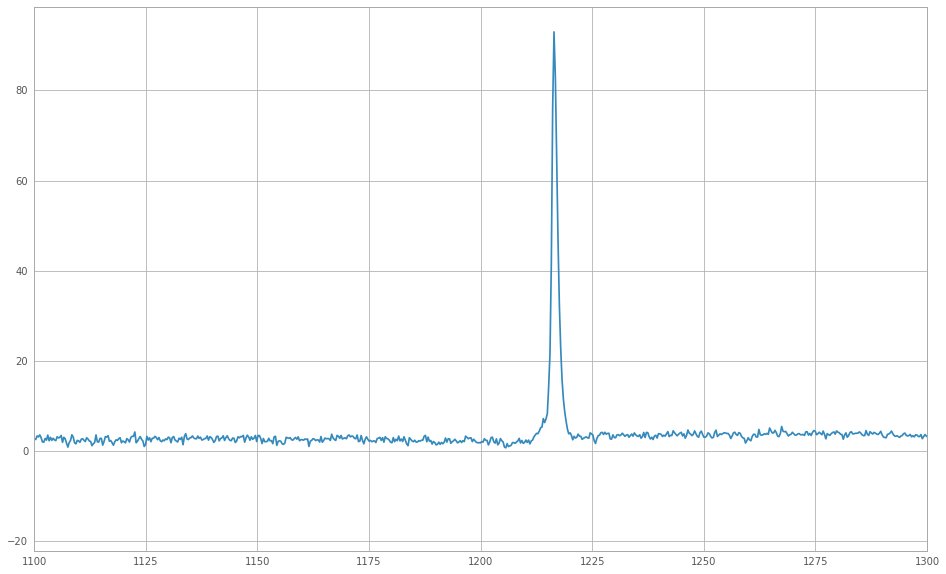

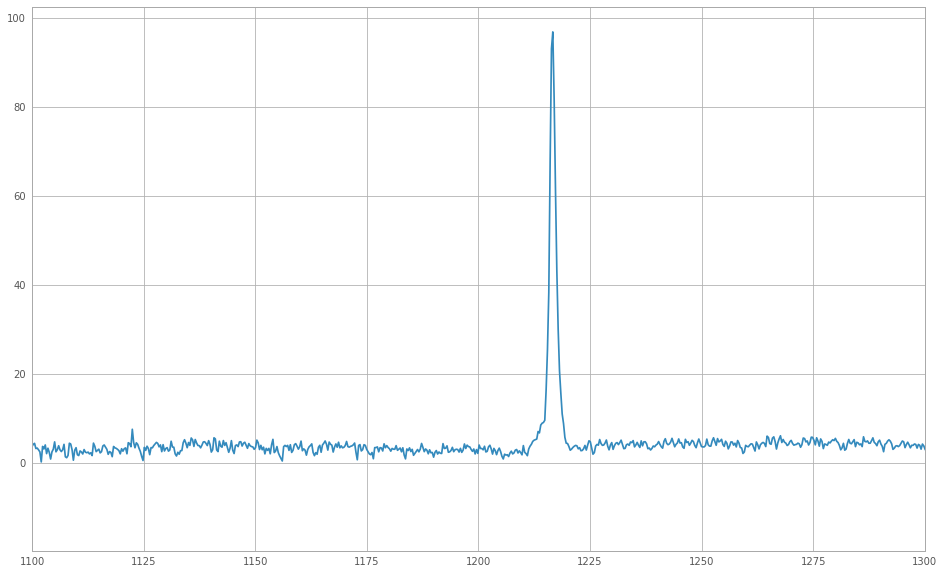

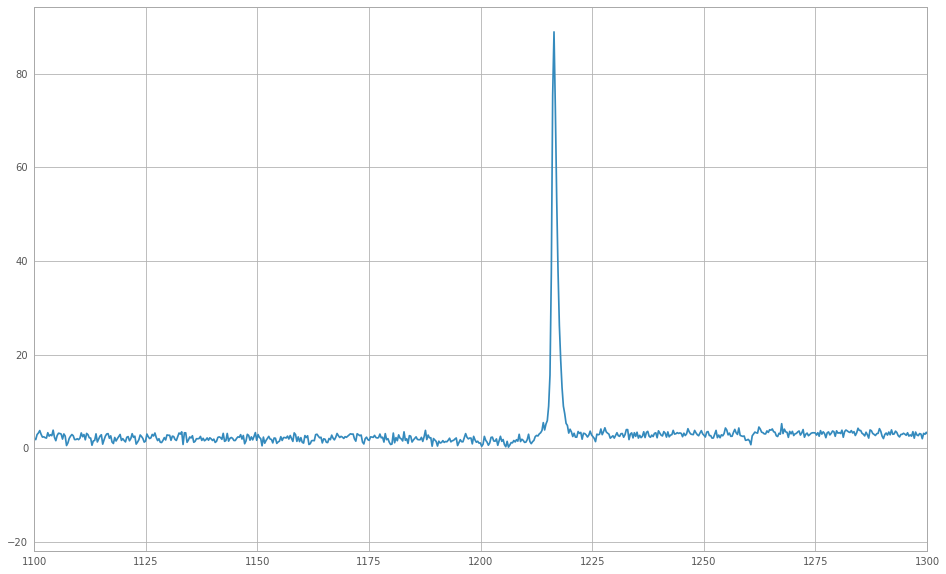

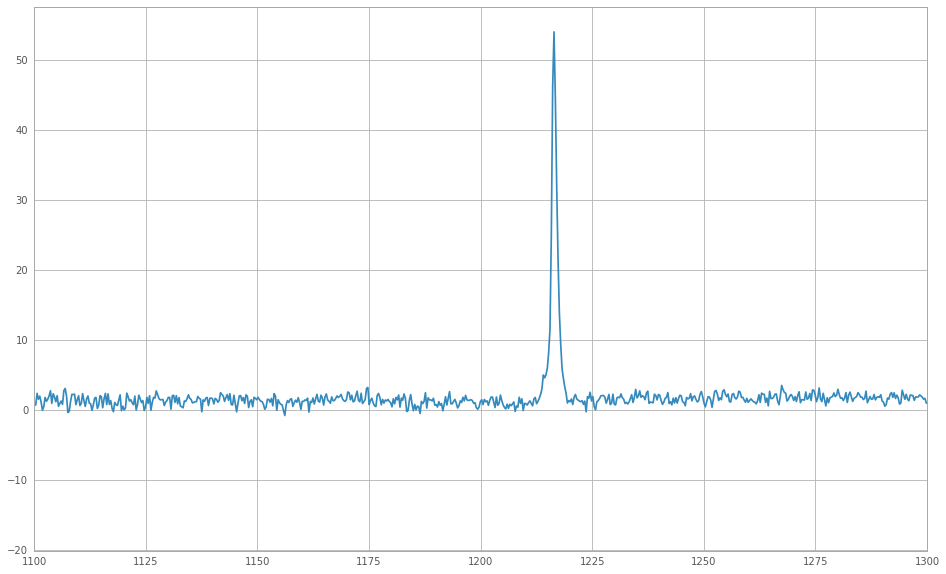

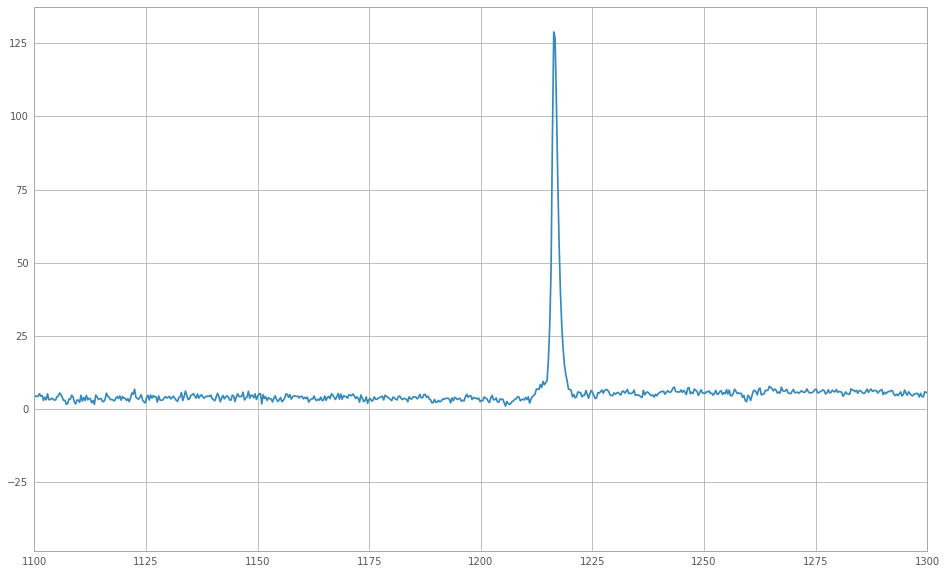

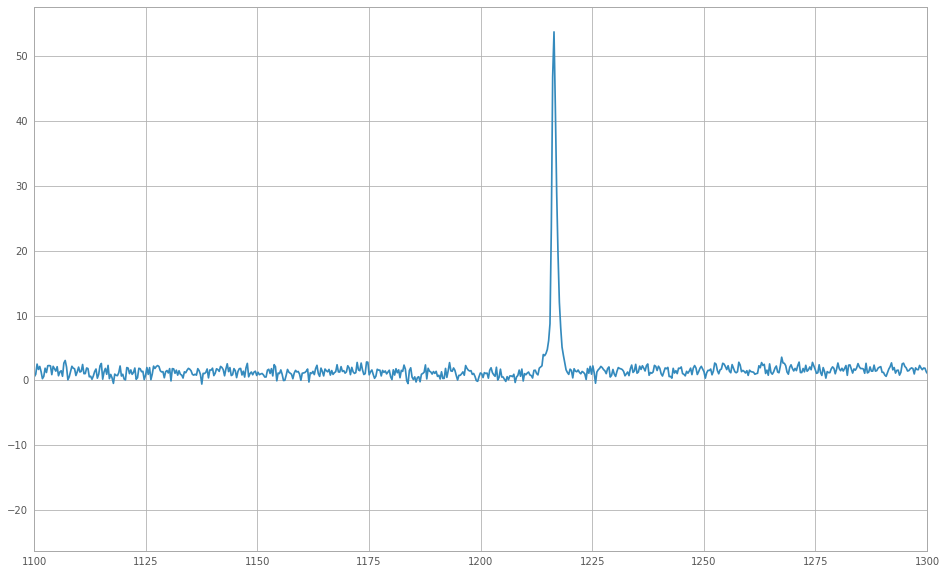

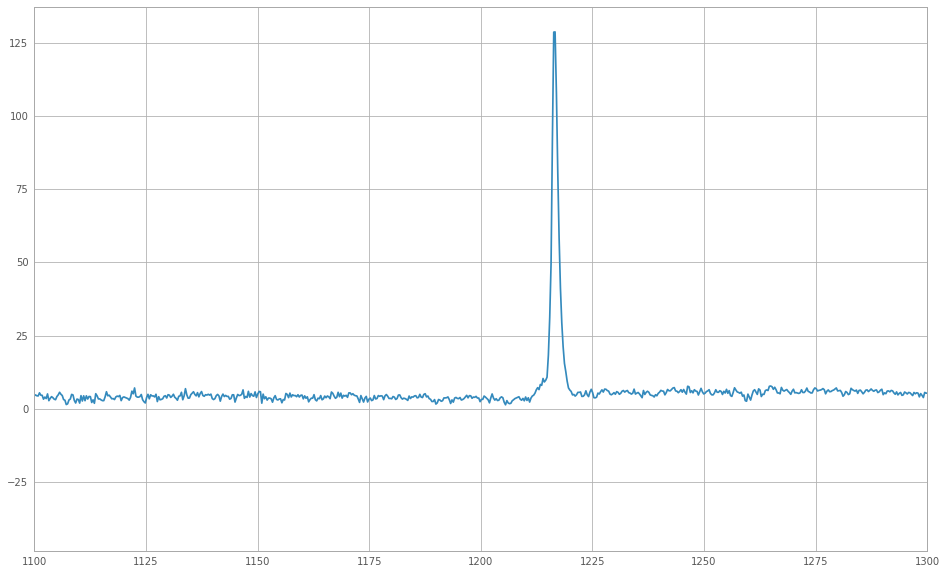

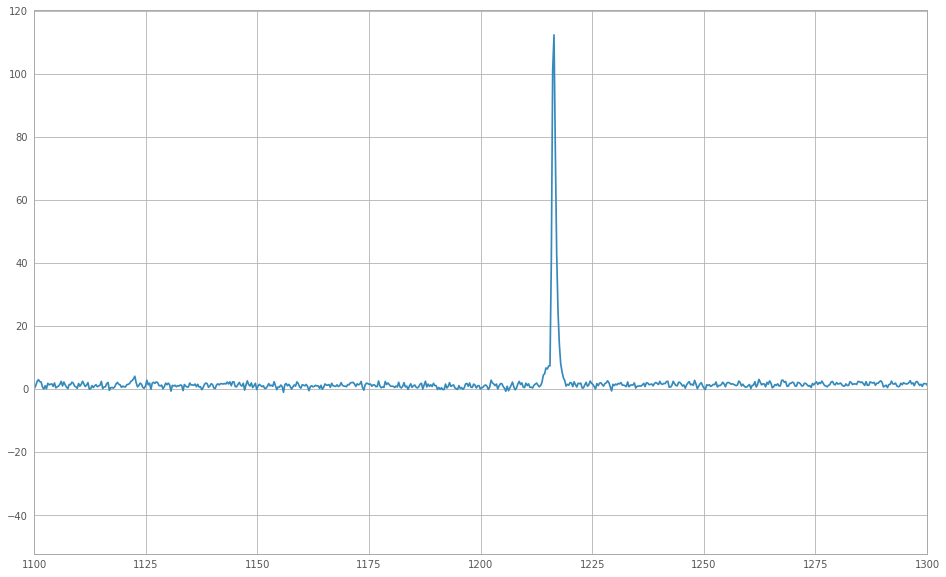

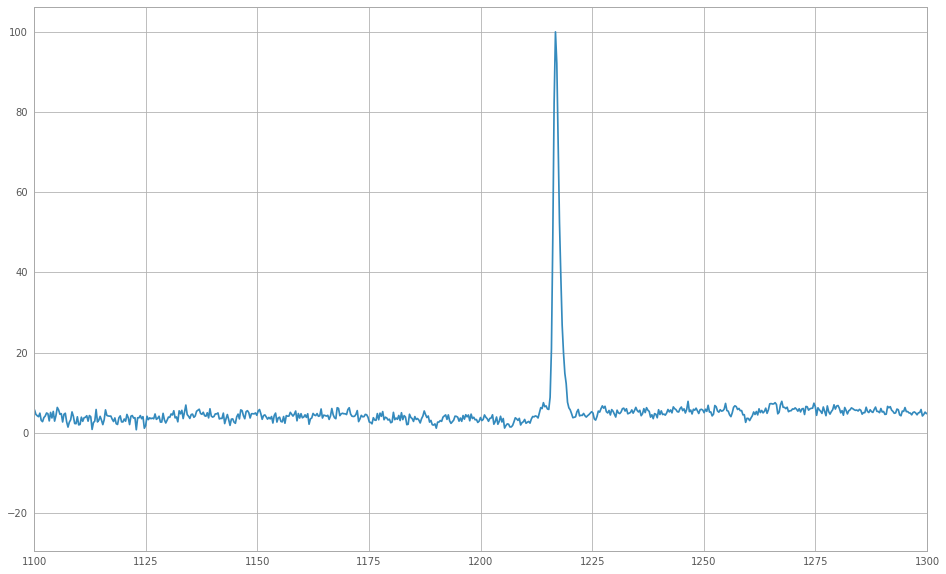

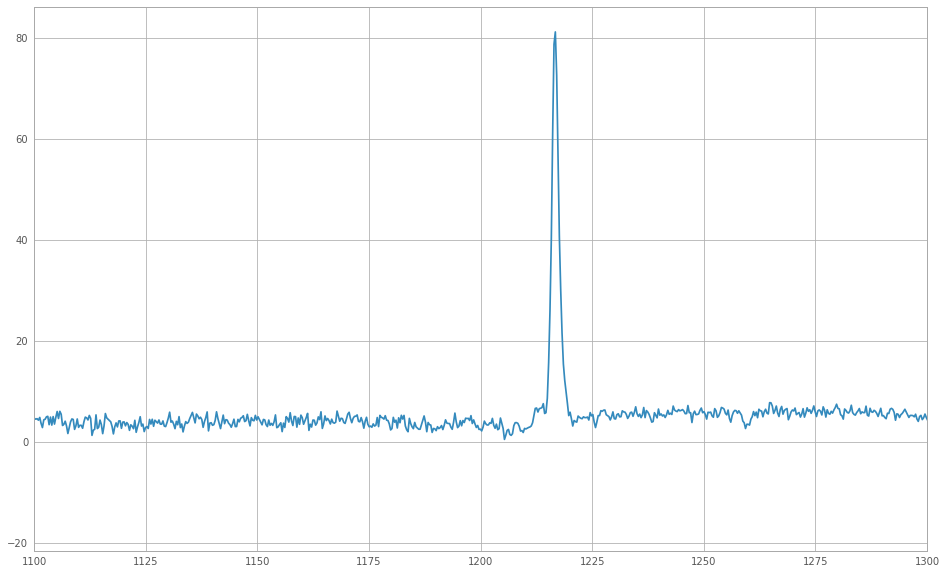

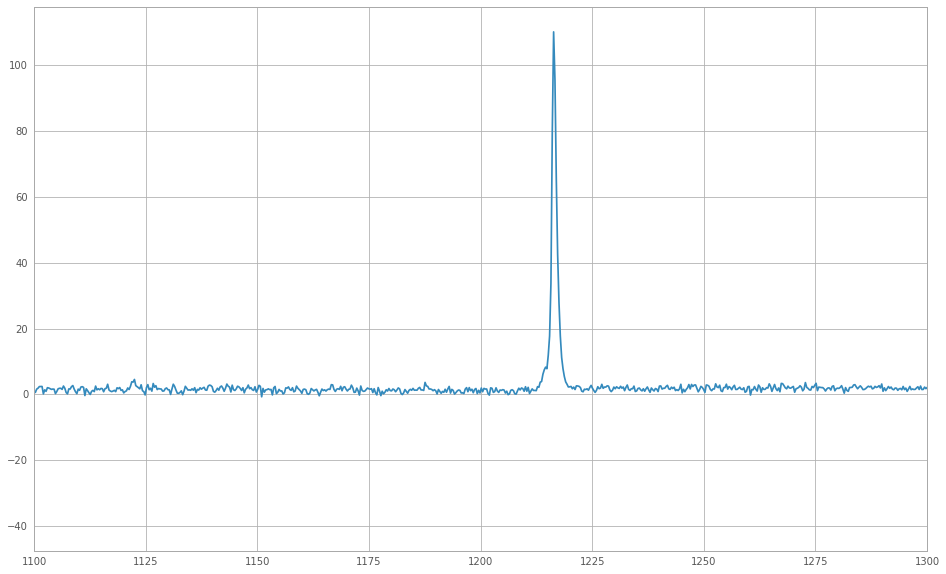

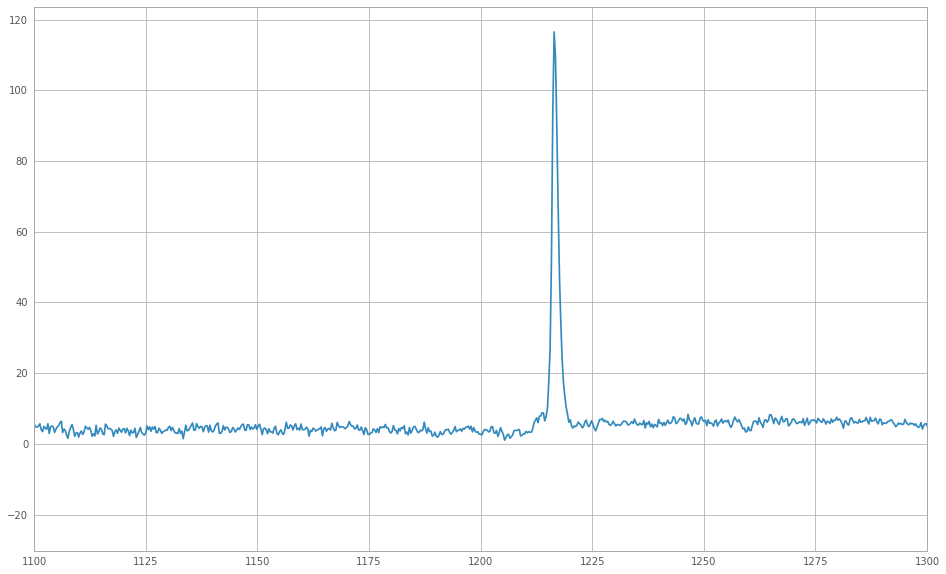

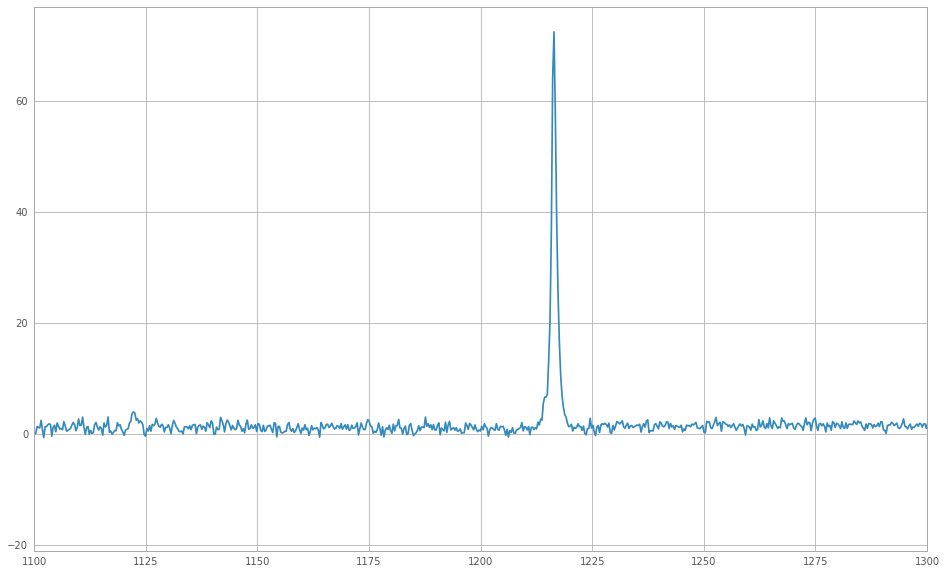

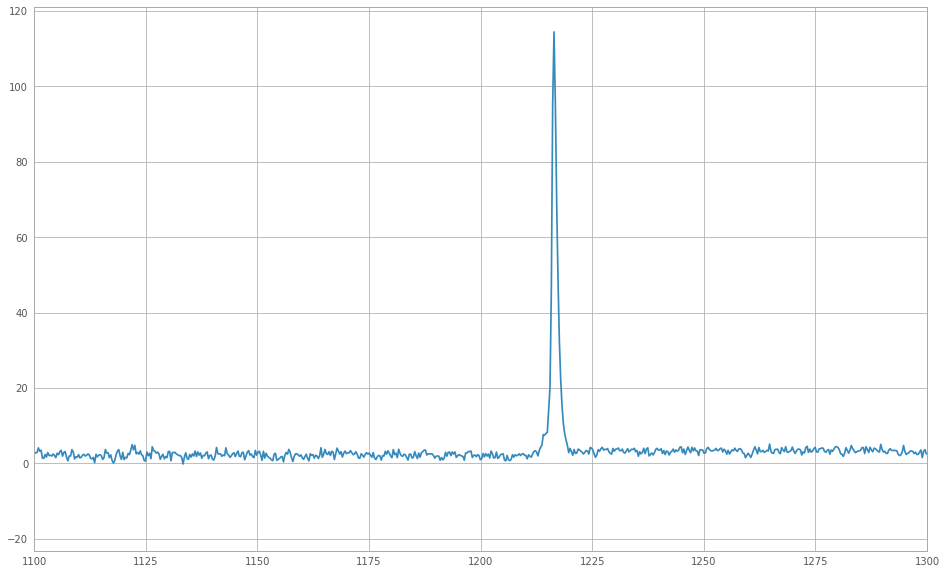

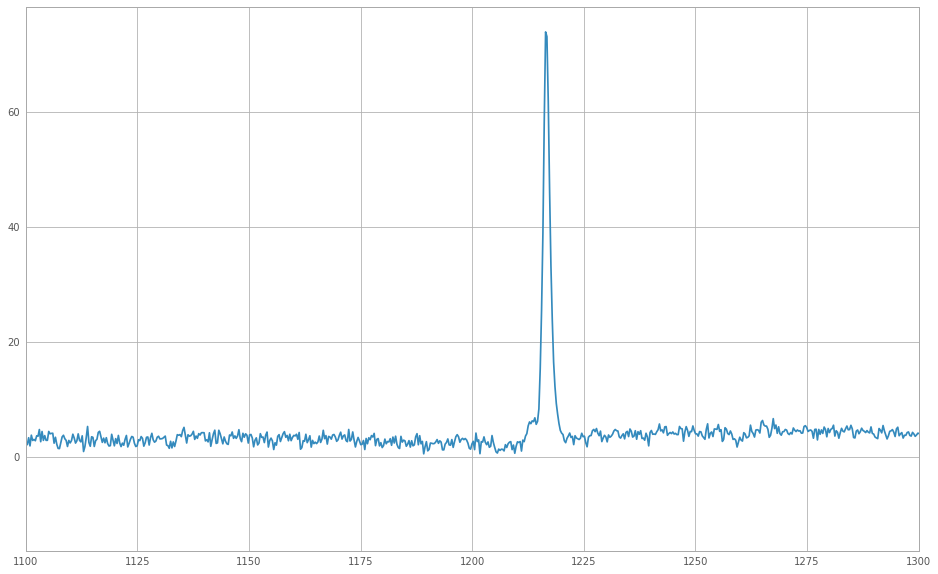

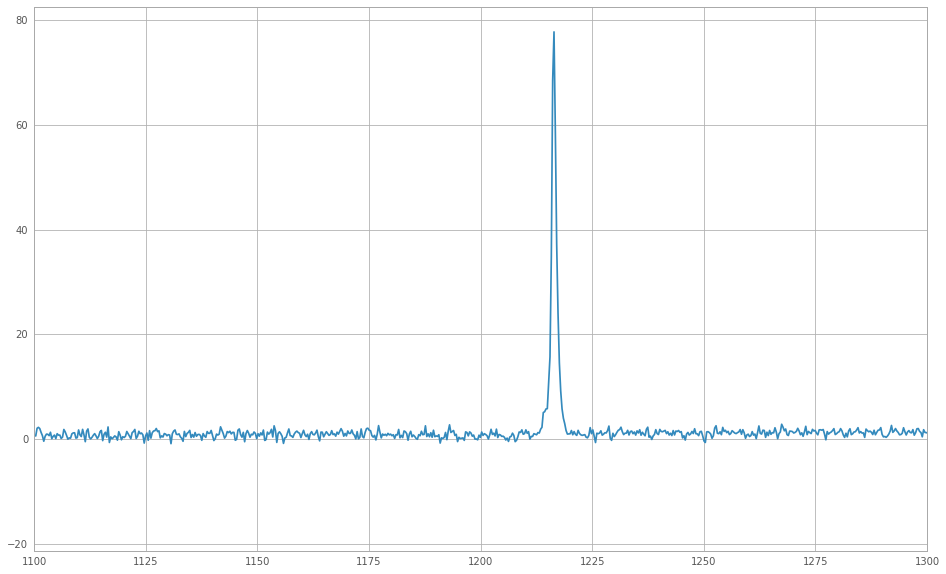

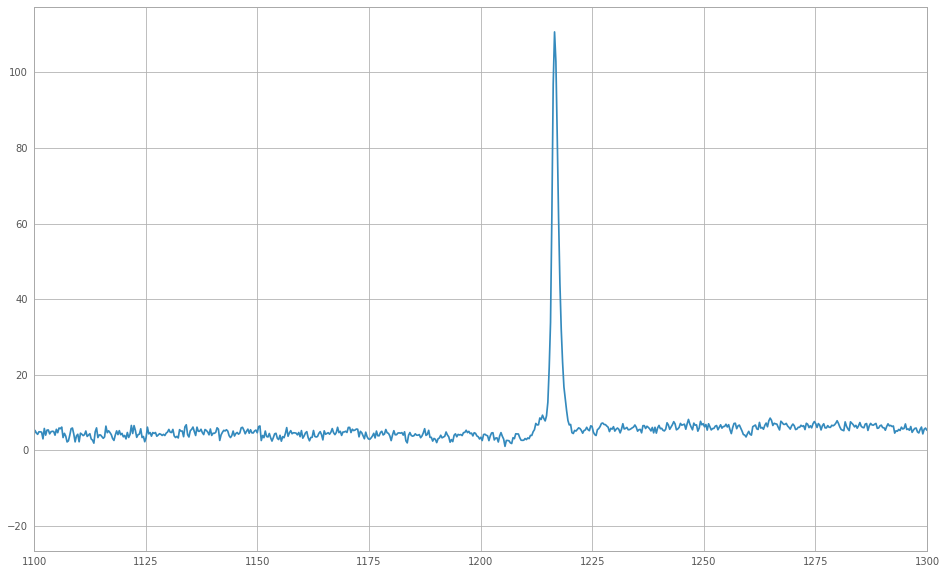

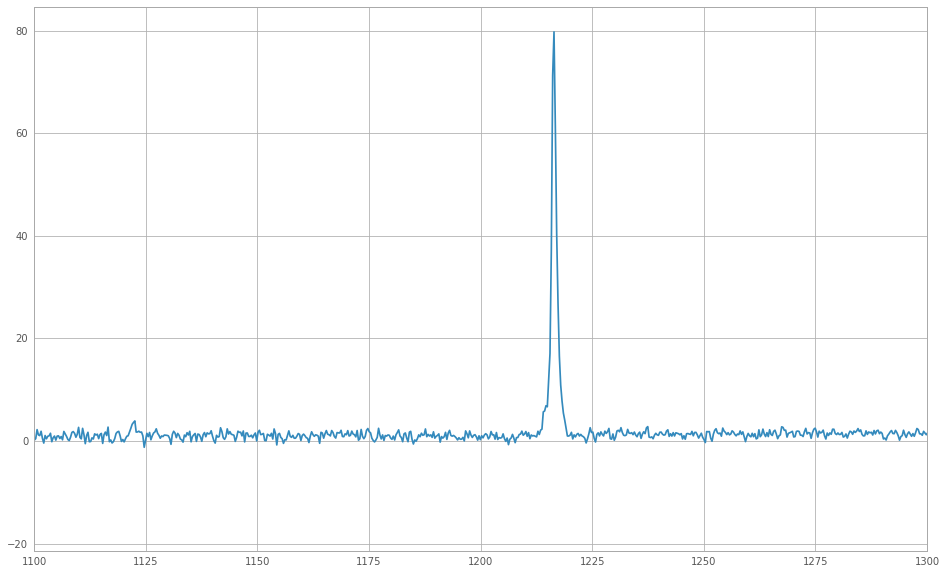

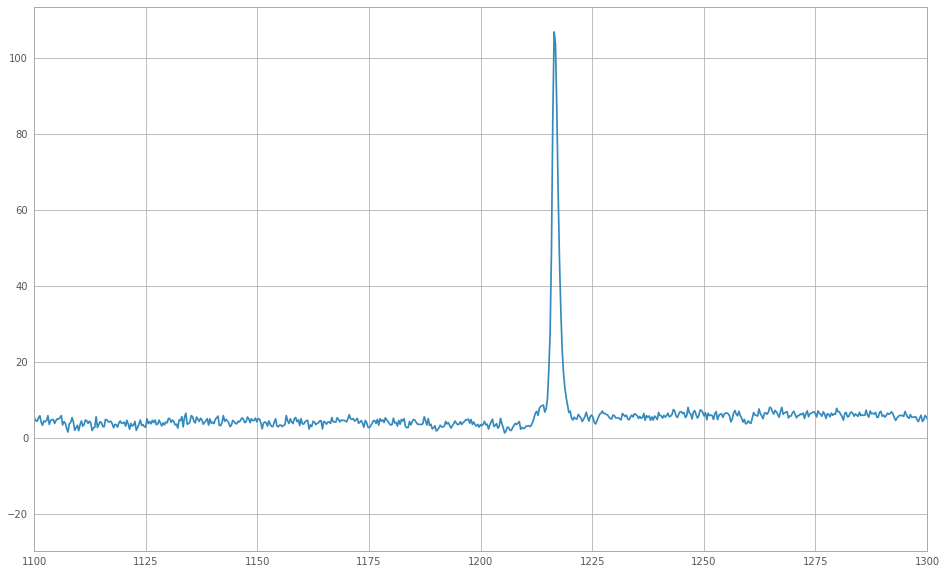

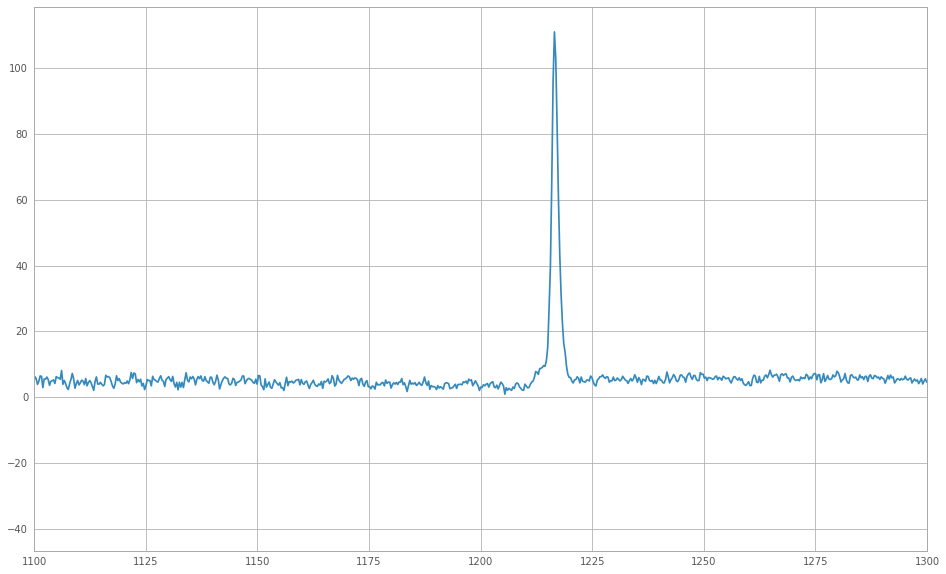

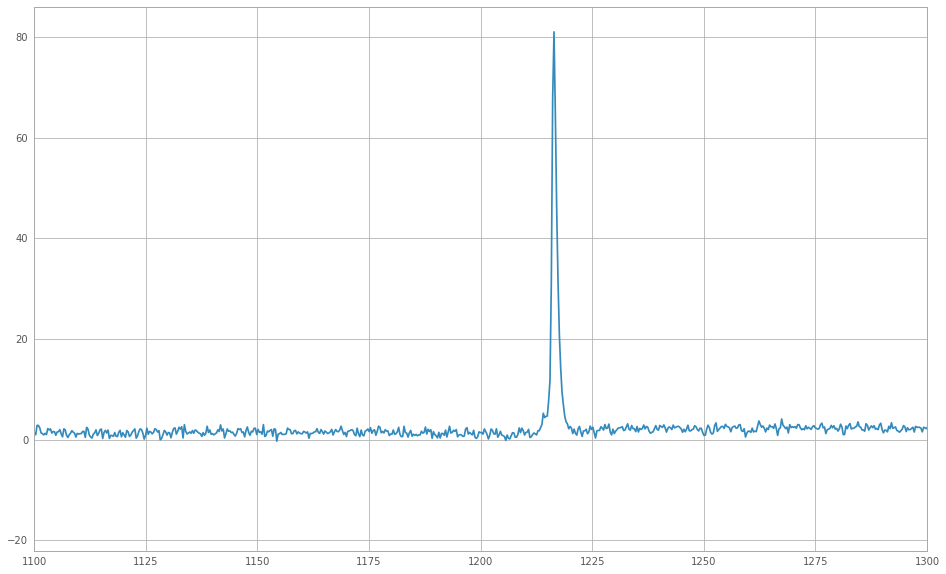

In [53]:
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_00.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)

df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_01.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_02.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_03.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_04.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_05.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_06.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_07.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_08.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_09.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_10.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_11.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_12.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_13.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_14.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_15.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_16.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_17.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_18.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_19.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)
df = genfromtxt('/home/magnus/Desktop/Experimentation/MUSE/release/stacks/meanstack_20.txt')
MUSE0=pd.DataFrame(df)
# plt.plot(MUSE0['0'],MUSE0['1'])
plt.figure(figsize=(16,10))
MUSE0.columns = ['x','y','z']
plt.plot(MUSE0['x'],MUSE0['y'])
plt.xlim(1100,1300)